# PANDAS

### Library Highlights
#### A fast and efficient DataFrame object for data manipulation with integrated indexing;

#### Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;

#### Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.0.3'

## Data Frames
#### A dataframe is like a two dimensional area. You can think of a dataframe as being like a table or a spreadsheet with rows and columns.

In [3]:
oo=pd.read_csv('olympics.csv',skiprows=4)
oo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


## Series
#### A Series is a one-dimensional array of indexed data. 

In [161]:
import numpy as np

s = pd.Series([1, 3, 5, np.nan, 6, 8])

## Access Series
#### You can access them using a square bracket, using either quotes and notation.


In [4]:
oo['City']

0         Athens
1         Athens
2         Athens
3         Athens
4         Athens
          ...   
29211    Beijing
29212    Beijing
29213    Beijing
29214    Beijing
29215    Beijing
Name: City, Length: 29216, dtype: object

In [5]:
oo.City

0         Athens
1         Athens
2         Athens
3         Athens
4         Athens
          ...   
29211    Beijing
29212    Beijing
29213    Beijing
29214    Beijing
29215    Beijing
Name: City, Length: 29216, dtype: object

In [6]:
type(oo.City)

pandas.core.series.Series

In [7]:
oo[['City','Athlete']]

,City,Athlete
0,Athens,"HAJOS, Alfred"
1,Athens,"HERSCHMANN, Otto"
2,Athens,"DRIVAS, Dimitrios"
3,Athens,"MALOKINIS, Ioannis"
4,Athens,"CHASAPIS, Spiridon"
...,...,...
29211,Beijing,"ENGLICH, Mirko"
29212,Beijing,"MIZGAITIS, Mindaugas"
29213,Beijing,"PATRIKEEV, Yuri"
29214,Beijing,"LOPEZ, Mijain"


In [8]:
type(oo[['City','Athlete']]) #2 or more series is of type dataframe

pandas.core.frame.DataFrame

## Data Input
#### excel, json, or SQL database tables, etc. : read_csv(), read_json(), read_sql_table()

oo=pd.read_csv('olympics.csv',skiprows=4) 

Skip rows ignores first n rows from the csv file

## Shape
#### The shape attribute returns a tuple, that's rows and columns i.e. the dimensionality of the DataFrame

In [9]:
oo.shape

(29216, 10)

## Head and Tail
#### The head and the tail return the first and last N rows of a DataFrame.

In [10]:
oo.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


## Info
#### Info provides a summary of the data frame including the number of entries, the data type, and the number of non-null entries for each series in the data frame. This is important because often when working with a real data set, there will be missing data.

In [11]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [164]:
oo.describe()

,Edition
count,29216.000000
mean,1967.713171
std,32.406293
min,1896.000000
25%,1948.000000
50%,1976.000000
75%,1996.000000
max,2008.000000


## Value_counts
#### It returns a series object, counting all the unique values. 
#### To be used with a series object and not a df.

In [12]:
pd.value_counts

<function pandas.core.algorithms.value_counts(values, sort: bool = True, ascending: bool = False, normalize: bool = False, bins=None, dropna: bool = True) -> 'Series'>

As this is returning a count of the unique values, the first value is the most frequently occurring element. The second, the second most frequently occurring element and so on. This order can be reversed by just setting the ascending flag to True. Dropna, one of the parameters within the value_counts is True by default and you will not get a count of the na values.

In [13]:
oo.Gender.value_counts()  

Men      21721
Women     7495
Name: Gender, dtype: int64

'Men' occurs 21k times in the gender series and 'Women' occurs 7k times

In [14]:
oo.Gender.value_counts(ascending=True)  

Women     7495
Men      21721
Name: Gender, dtype: int64

## Sort_value
#### sort_values() sorts the values in a series. As axis is equal to zero, you are sorting along the column and in ascending order by default. So if you visualize a series as being a single column, you are sorting the contents of that column in ascending order. By default, the NaNs, or missing data, are put right at the end. 

In [15]:
oo.Athlete.sort_values()

651                 AABYE, Edgar
2849       AALTONEN, Arvo Ossian
2852       AALTONEN, Arvo Ossian
7716    AALTONEN, Paavo Johannes
7730    AALTONEN, Paavo Johannes
                  ...           
603                   ÖSTMO, Ole
608                   ÖSTMO, Ole
621                   ÖSTMO, Ole
596                   ÖSTMO, Ole
8051           ÖSTRAND, Per-Olof
Name: Athlete, Length: 29216, dtype: object

In [16]:
oo.Athlete.sort_values()

#And by default, inplace is equal to false, which means a new series will be returned.

651                 AABYE, Edgar
2849       AALTONEN, Arvo Ossian
2852       AALTONEN, Arvo Ossian
7716    AALTONEN, Paavo Johannes
7730    AALTONEN, Paavo Johannes
                  ...           
603                   ÖSTMO, Ole
608                   ÖSTMO, Ole
621                   ÖSTMO, Ole
596                   ÖSTMO, Ole
8051           ÖSTRAND, Per-Olof
Name: Athlete, Length: 29216, dtype: object

In [17]:
oo.sort_values(by=['Edition','Athlete'])

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
82,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,rope climbing,M,Gold
110,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,"team, parallel bars",M,Silver
111,Athens,1896,Gymnastics,Artistic G.,"ATHANASOPOULOS, Spyros",GRE,Men,"team, parallel bars",M,Silver
48,Athens,1896,Cycling,Cycling Road,"BATTEL, Edward",GBR,Men,individual road race,M,Bronze
...,...,...,...,...,...,...,...,...,...,...
28095,Beijing,2008,Equestrian,Dressage,"ZU-SAYN WITTGENSTEIN, Nathalie",DEN,Women,team,X,Bronze
28819,Beijing,2008,Sailing,Sailing,"ZUBARI, Shahar",ISR,Men,RS:X - Windsurfer,M,Bronze
28977,Beijing,2008,Taekwondo,Taekwondo,"ZUBCIC, Martina",CRO,Women,49 - 57 kg,W,Bronze
28387,Beijing,2008,Gymnastics,Rhythmic G.,"ZUEVA, Natalia",RUS,Women,group competition,W,Gold


## Boolean Indexing
#### Boolean vectors can be used to filter data

In [18]:
oo.Medal=='Gold'

0         True
1        False
2        False
3         True
4        False
         ...  
29211    False
29212    False
29213    False
29214     True
29215    False
Name: Medal, Length: 29216, dtype: bool

In [19]:
oo[(oo.Medal=='Gold') &( oo.Gender=='Women')] 
# () brackets between & are important

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
417,Paris,1900,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,individual,W,Gold
641,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,mixed doubles,X,Gold
649,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,singles,W,Gold
710,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double columbia round (50y - 40y - 30y),W,Gold
713,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double national round (60y - 50y),W,Gold
...,...,...,...,...,...,...,...,...,...,...
29134,Beijing,2008,Weightlifting,Weightlifting,"CAO, Lei",CHN,Women,75kg,W,Gold
29147,Beijing,2008,Wrestling,Wrestling Free.,"HUYNH, Carol",CAN,Women,- 48kg,W,Gold
29155,Beijing,2008,Wrestling,Wrestling Free.,"YOSHIDA, Saori",JPN,Women,48 - 55kg,W,Gold
29163,Beijing,2008,Wrestling,Wrestling Free.,"ICHO, Kaori",JPN,Women,55 - 63kg,W,Gold


We can see that we've now got a data frame where all women athletes have won a gold medal.

## String Handling
#### Available to every series using str attribute
#### Series.str - access values of seies as strings and apply several methods to it

In [20]:
oo[oo.Athlete.str.contains('Florence')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1843,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,individual,W,Gold
1848,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,pairs,X,Bronze
4173,Paris,1924,Aquatics,Swimming,"BARKER, Florence",GBR,Women,4x100m freestyle relay,W,Silver
8162,Helsinki,1952,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Bronze
9060,Melbourne / Stockholm,1956,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Silver
10849,Tokyo,1964,Athletics,Athletics,"AMOORE-POLLOCK, Judith Florence",AUS,Women,400m,W,Bronze
16817,Los Angeles,1984,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Silver
18287,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,100m,W,Gold
18305,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Gold
18347,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,4x100m relay,W,Gold


## Challenge 1

- In which events did Jesse Owens win a medal? 
- Which country has won the most men's gold medals in singles badminton over the years? Sort the results alphabetically by the players' names. 
- Which three countries have won the most medals in recent years, that's from 1984 to 2008? 
- Display the male gold medal winners of the 100-meters track and field sprint event over the years. List the results starting with the most recent first and show the Olympic city, edition, athlete and the country they represent. 

In [21]:
oo.Event[(oo.Athlete.str.contains('OWENS, Jesse')) & (oo.Medal!='NA' )]

6427            100m
6439            200m
6456    4x100m relay
6523       long jump
Name: Event, dtype: object

In [22]:
bmm=oo[(oo.Sport=='Badminton') & (oo.Gender=='Men') & (oo.Medal=='Gold')].sort_values('Athlete')
bmm.NOC.value_counts()

INA    8
KOR    6
CHN    4
DEN    1
Name: NOC, dtype: int64

In [23]:
oo.NOC[(oo.Edition>1983)].value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

In [24]:
mgm=oo[(oo.Gender=='Men') & (oo.Medal=='Gold') & (oo.Event=='100m')].sort_values(by='Edition', ascending=False) 
mgm[['City', 'Edition','Athlete','NOC']]

### passing a list of column names


,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


## Index

#### The index object is an immutable array, and indexing allows you to access a row or a column using a label

In [25]:
type(oo.index)  # index has its own type and is not series or a dataframe.

pandas.core.indexes.range.RangeIndex

In [26]:
oo.index[100]

100

In [27]:
oo.index[100]=5 #Index array is immutable

TypeError: Index does not support mutable operations

## Set_Index

#### The set index allows us to determine which of the series is going to be the index. We will use the set index with one key parameter, which is the keys.

In [28]:
oo.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [29]:
oo.set_index('Athlete').head(3)

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


In [30]:
oo.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


#### we find that the data frame has reverted to the original index. There is a very simple reason for this. And that is, that when we set index, we need to set the index to athlete. Now, what we need to do is we need to specify that inplace is equal to true so that those changes are made to the original data frame. 

In [31]:
oo.set_index('Athlete',inplace=True)

In [32]:
oo.head(3)

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


In [33]:
oo.reset_index(inplace=True)  #resetting it to integers

In [34]:
ath=oo.set_index('Athlete') #creating a copy

In [35]:
ath.head(3)

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"HAJOS, Alfred",Athens,1896,Aquatics,Swimming,HUN,Men,100m freestyle,M,Gold
"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze


In [36]:
ath.sort_index(inplace=True,ascending=False)

In [37]:
ath.head(3) 

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"ÖSTRAND, Per-Olof",Helsinki,1952,Aquatics,Swimming,SWE,Men,400m freestyle,M,Bronze
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"free rifle, team",M,Silver
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, standing",M,Silver


## loc

#### loc[ ] is a label-based indexer, that means you are selecting by the labels. And notice that "loc[ ]" uses square brackets and not regular brackets.

In [38]:
ath.loc['BOLT, Usain']  

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,4x100m relay,M,Gold
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,200m,M,Gold
"BOLT, Usain",Beijing,2008,Athletics,Athletics,JAM,Men,100m,M,Gold


## iloc
#### Integer based.  One of the advantages of Iloc is that it allows for the traditional Pythonic slicing. 

In [39]:
oo.iloc[10]

Athlete         PEPANOS, Antonios
City                       Athens
Edition                      1896
Sport                    Aquatics
Discipline               Swimming
NOC                           GRE
Gender                        Men
Event              400m freestyle
Event_gender                    M
Medal                      Silver
Name: 10, dtype: object

In [40]:
oo.iloc[[10,100,1000]]

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
10,"PEPANOS, Antonios",Athens,1896,Aquatics,Swimming,GRE,Men,400m freestyle,M,Silver
100,"FLATOW, Alfred",Athens,1896,Gymnastics,Artistic G.,GER,Men,"team, parallel bars",M,Gold
1000,"STEFFEN, Otto",St Louis,1904,Gymnastics,Artistic G.,USA,Men,team competition,M,Silver


In [41]:
oo.iloc[1:4]

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
1,"HERSCHMANN, Otto",Athens,1896,Aquatics,Swimming,AUT,Men,100m freestyle,M,Silver
2,"DRIVAS, Dimitrios",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Bronze
3,"MALOKINIS, Ioannis",Athens,1896,Aquatics,Swimming,GRE,Men,100m freestyle for sailors,M,Gold


## Challenge 2

-  Plot the total number of medals awarded at each of the Olympic games throughout history. 
- Which countries did not win a medal in the 2008 Olympics? How many countries were there? 

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline

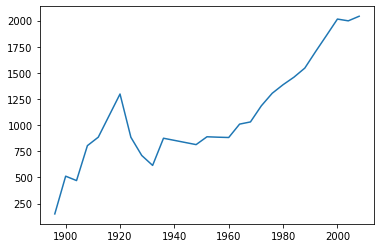

In [43]:
oo.Edition.value_counts().sort_index().plot()

## Group By
####  It applies a function to each group independently and it combines the results into a DataFrame. 
#### The Groupby object isn't a DataFrame but rather a group of DataFrames in a dict-like structure. 

## Group By Object

In [44]:
 oo.groupby('Edition') #returns a groupby object

In [45]:
type( oo.groupby('Edition'))

pandas.core.groupby.generic.DataFrameGroupBy

We can iterate through groups. Asmentioned earlier, each of these groups are data frames. What we can do here, is to print out the key and then print out the rows corresponding to that key. 

In [46]:
for group_key,group_value in oo.groupby('Edition'):
    print("GROUP KEY ---->"  ,group_key)
    print(group_value)

GROUP KEY ----> 1896
                      Athlete    City  Edition          Sport  \
0               HAJOS, Alfred  Athens     1896       Aquatics   
1            HERSCHMANN, Otto  Athens     1896       Aquatics   
2           DRIVAS, Dimitrios  Athens     1896       Aquatics   
3          MALOKINIS, Ioannis  Athens     1896       Aquatics   
4          CHASAPIS, Spiridon  Athens     1896       Aquatics   
..                        ...     ...      ...            ...   
146             JENSEN, Viggo  Athens     1896  Weightlifting   
147       ELLIOTT, Launceston  Athens     1896  Weightlifting   
148  CHRISTOPOULOS, Stephanos  Athens     1896      Wrestling   
149            SCHUMANN, Carl  Athens     1896      Wrestling   
150          TSITAS, Georgios  Athens     1896      Wrestling   

          Discipline  NOC Gender                        Event Event_gender  \
0           Swimming  HUN    Men               100m freestyle            M   
1           Swimming  AUT    Men          

GROUP KEY ----> 1996
                   Athlete     City  Edition      Sport       Discipline  NOC  \
21302       XIAO, Hailiang  Atlanta     1996   Aquatics           Diving  CHN   
21303       SAUTIN, Dmitry  Atlanta     1996   Aquatics           Diving  RUS   
21304          HEMPEL, Jan  Atlanta     1996   Aquatics           Diving  GER   
21305    CLARK, Mary Ellen  Atlanta     1996   Aquatics           Diving  USA   
21306          FU, Mingxia  Atlanta     1996   Aquatics           Diving  CHN   
...                    ...      ...      ...        ...              ...  ...   
23156  OLEYNYK, Vyacheslav  Atlanta     1996  Wrestling  Wrestling Gre-R  UKR   
23157      FAFINSKI, Jacek  Atlanta     1996  Wrestling  Wrestling Gre-R  POL   
23158    LJUNGBERG, Mikael  Atlanta     1996  Wrestling  Wrestling Gre-R  SWE   
23159     WRONSKI, Andrzej  Atlanta     1996  Wrestling  Wrestling Gre-R  POL   
23160     LISHTVAN, Sergey  Atlanta     1996  Wrestling  Wrestling Gre-R  BLR   

      

In [47]:
type(group_value)

pandas.core.frame.DataFrame

## Groupby Computations

In [48]:
oo.groupby('Edition').size()  # similar to group_value

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

In [49]:
oo.groupby(['Edition', 'NOC','Medal']).agg({'Edition' : ['min','max','count'] })

Edition            
                       min   max count
Edition NOC Medal                     
1896    AUS Gold      1896  1896     2
        AUT Bronze    1896  1896     2
            Gold      1896  1896     2
            Silver    1896  1896     1
        DEN Bronze    1896  1896     3
...                    ...   ...   ...
2008    UZB Silver    2008  2008     2
        VEN Bronze    2008  2008     1
        VIE Silver    2008  2008     1
        ZIM Gold      2008  2008     1
            Silver    2008  2008     3

[2356 rows x 3 columns]

In [50]:
oo.loc[oo.Athlete=='LEWIS, Carl'].groupby('Athlete').agg({'Edition' : ['min','max','count'] })

Edition            
                min   max count
Athlete                        
LEWIS, Carl    1984  1996    10

## Challenge 3

- Using groupby, plot the total number of medals awarded at each of the Olympic games throughout history 
- Create a list showing the total number of medals won for each country over the history of the Olympics. For each country, include the year of the first and the most recent Olympic medal wins. I'll see you at the solution video.

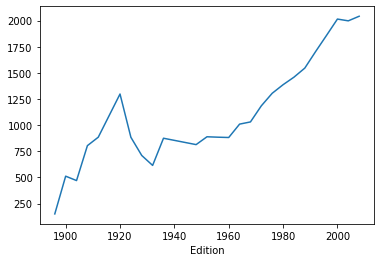

In [51]:
oo.groupby('Edition').size().plot()

In [52]:
oo.groupby('NOC').agg(['count','min','max'])  #Check count, m

Athlete                                                  City             \
      count                     min                     max count        min   
NOC                                                                            
AFG       1        NIKPAI, Rohullah        NIKPAI, Rohullah     1    Beijing   
AHO       1         BOERSMA, Jan D.         BOERSMA, Jan D.     1      Seoul   
ALG      14        ALLALOU, Mohamed          ZAOUI, Mohamed    14    Atlanta   
ANZ      29      BAKER, Reginald L.       WYLIE, Wilhelmina    29     London   
ARG     239         ACOSTA, Lautaro          ZUMELZU, A. B.   239  Amsterdam   
..      ...                     ...                     ...   ...        ...   
VIE       2         HOANG, Anh Tuan         TRAN, Hieu Ngan     2    Beijing   
YUG     435  ANASTASOVSKI, Svetlana           ZUZEJ, Marjan   435  Amsterdam   
ZAM       2          MATETE, Samuel            MWILA, Keith     2    Atlanta   
ZIM      23  BOXHALL, Arlene Nadine  WATSON, Linda Margaret    23     Athens   
ZZX      48            AABYE, Edgar       WINCKLER, Charles    48     Athens   

                 Edition             Sport  ... Gender Event  \
             max   count   min   max count  ...    max count   
NOC                                         ...                
AFG      Beijing       1  2008  2008     1  ...    Men     1   
AHO        Seoul       1  1988  1988     1  ...    Men     1   
ALG       Sydney      14  1984  2008    14  ...  Women    14   
ANZ    Stockholm      29  1908  1912    29  ...  Women    29   
ARG        Tokyo     239  1924  2008   239  ...  Women   239   
..           ...     ...   ...   ...   ...  ...    ...   ...   
VIE       Sydney       2  2000  2008     2  ...  Women     2   
YUG        Tokyo     435  1924  2000   435  ...  Women   435   
ZAM  Los Angeles       2  1984  1996     2  ...    Men     2   
ZIM       Moscow      23  1980  2008    23  ...  Women    23   
ZZX     St Louis      48  1896  1904    48  ...  Women    48   

                                                       Event_gender          \
                              min                  max        count min max   
NOC                                                                           
AFG                       - 58 kg              - 58 kg            1   M   M   
AHO           board (division II)  board (division II)            1   M   M   
ALG                         1500m            high jump           14   M   W   
ANZ                100m freestyle       singles indoor           29   M   W   
ARG       + 79.38kg (heavyweight)           volleyball          239   M   X   
..                            ...                  ...          ...  ..  ..   
VIE  - 56kg, total (bantamweight)           49 - 57 kg            2   M   W   
YUG   + 100kg (super heavyweight)           water polo          435   M   W   
ZAM      - 48kg (light-flyweight)         400m hurdles            2   M   M   
ZIM               100m backstroke               hockey           23   W   W   
ZZX                   4miles team           tug of war           48   M   X   

    Medal                  
    count     min     max  
NOC                        
AFG     1  Bronze  Bronze  
AHO     1  Silver  Silver  
ALG    14  Bronze  Silver  
ANZ    29  Bronze  Silver  
ARG   239  Bronze  Silver  
..    ...     ...     ...  
VIE     2  Silver  Silver  
YUG   435  Bronze  Silver  
ZAM     2  Bronze  Silver  
ZIM    23  Bronze  Silver  
ZZX    48  Bronze  Silver  

[138 rows x 27 columns]

## Stack and Unstack

#### The stack function allows you to move the inner columns to the rows for the dataframe and the unstack function does the reverse.

In [54]:
mw = oo[(oo.Edition==2008) & ((oo.Event=='100m') | (oo.Event=='200m'))]

In [56]:
g=mw.groupby(['NOC','Gender','Discipline','Event']).size()
g

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

In [66]:
df=g.unstack(['Discipline','Event'])

When using the stack function, the stack function returns a data frame or a series. And notice that you will never have any NAN values or missing data because by default the drop any flag is equal to true. 

STACKING GIVES TALLER DF AND UNSTACKING GIVES A WIDER DF

In [71]:
df.stack() #We can state which column we want to unstack in the ()

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

With unstack, we return a series or a DataFrame. Because the NAN values, or the missing data values are displayed, you have the option to fill them with another value. So, in the example of the Olympic data set that we are working on, it would make sense to have every NAN value to be zero, because that means that there were no medals won for that event.

In [72]:
df.unstack() #We can state which column we want to unstack in the ()

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

## Challenge
- Plot the number of gold medals won by the USA male and female athletes throughout the history of the Olympics. 
- Plot the five athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals and then bronze medals. 

In [143]:
df1=oo[(oo.NOC=='USA') & (oo.Medal=='Gold')]
df1.groupby(['Edition', 'Gender']).size()

Edition  Gender
1896     Men        11
1900     Men        26
         Women       1
1904     Men       140
         Women       6
1908     Men        34
1912     Men        45
1920     Men       103
         Women       7
1924     Men        95
         Women      15
1928     Men        34
         Women       9
1932     Men        61
         Women      17
1936     Men        44
         Women       7
1948     Men        75
         Women       8
1952     Men        72
         Women       7
1956     Men        57
         Women       4
1960     Men        51
         Women      17
1964     Men        63
         Women      15
1968     Men        59
         Women      24
1972     Men        37
         Women      16
1976     Men        56
         Women       7
1984     Men       106
         Women      62
1988     Men        49
         Women      28
1992     Men        57
         Women      32
1996     Men        59
         Women     101
2000     Men        68
         Women    

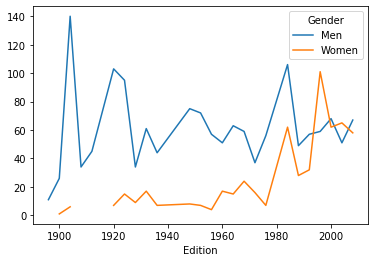

In [147]:
df1.groupby(['Edition', 'Gender']).size().unstack('Gender').plot()

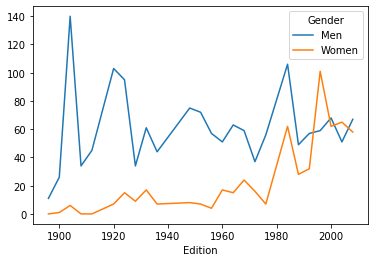

In [148]:
df1.groupby(['Edition', 'Gender']).size().unstack('Gender',fill_value=0).plot()

In [150]:
oo.groupby(['Athlete','Medal']).size()

Athlete                    Medal 
AABYE, Edgar               Gold      1
AALTONEN, Arvo Ossian      Bronze    2
AALTONEN, Paavo Johannes   Bronze    2
                           Gold      3
AAMODT, Ragnhild           Gold      1
                                    ..
ÖSTERVOLD, Kristian Olsen  Gold      1
ÖSTERVOLD, Ole Olsen       Gold      1
ÖSTMO, Ole                 Bronze    2
                           Silver    2
ÖSTRAND, Per-Olof          Bronze    1
Length: 25127, dtype: int64

In [153]:
df2=oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)

In [154]:
df2.sort_values(['Gold','Silver','Bronze'],ascending=False)

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2,14,0
"LATYNINA, Larisa",4,9,5
"NURMI, Paavo",0,9,3
"SPITZ, Mark",1,9,1
"LEWIS, Carl",0,9,1
...,...,...,...
"ZYCH, Boguslaw",1,0,0
"ZÄHRINGER, Klaus",1,0,0
"ZÜHLKE, Steffen",1,0,0


In [156]:
df2.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']]

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0
...,...,...,...
"ZYCH, Boguslaw",0,0,1
"ZÄHRINGER, Klaus",0,0,1
"ZÜHLKE, Steffen",0,0,1


In [157]:
df2.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head(5)

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


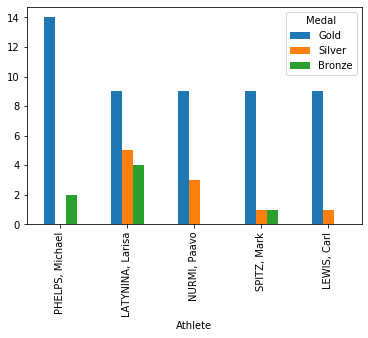

In [159]:
df2.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head(5).plot(kind='bar')